# Analyze solution
This notebooks provides scripts to analyze specific solution.

## Init
Change path to relevant problem and solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from analyze_solution import *
   
problem, solution, solution_geo = (get_data(
    problem_path = '../experiments/demo/problems/balance.delivery.100.json',
    solution_path = '../experiments/demo/out/base_balance.delivery.100/solution_0.json')
)

## TODO

### Problem statistics

In [2]:
extract_problem_statistics(problem)

,jobs,vehicle types,vehicle profiles,total vehicles,relations
0,100,1,1,5,0


### Jobs
* `deliveries`, `pickups`, `replacements`, `services` columns show amount of such task types per single job
* `0` is used for `time window duration` when `time window` is not defined

In [3]:
extract_jobs_statistics(problem).describe()

,deliveries,pickups,replacements,services,service time duration,time window duration
count,100.0,100.0,100.0,100.0,100.0,100.0
mean,1.0,0.0,0.0,0.0,300.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,1.0,0.0,0.0,0.0,300.0,0.0
25%,1.0,0.0,0.0,0.0,300.0,0.0
50%,1.0,0.0,0.0,0.0,300.0,0.0
75%,1.0,0.0,0.0,0.0,300.0,0.0
max,1.0,0.0,0.0,0.0,300.0,0.0


### Vehicle types

In [4]:
extract_vehicle_statistics(problem)

,type,available,capacity,breaks,reloads,start location,start time,end location,end time
0,vehicle,5,[20],1,0,"52.4181,13.4637",2020-05-01T09:00:00.00Z,"52.4181,13.4637",2020-05-01T18:00:00.00Z


### Objective functions

In [5]:
objectives = extract_problem_objectives(problem)

objectives

,index,type,priority,options.tolerance
0,0,minimize-unassigned,primary,NaN
1,1,minimize-tours,primary,NaN
2,0,minimize-cost,secondary,NaN
3,1,balance-distance,secondary,0.01


## Solution statistics

In [6]:
extract_solution_statistics(solution)

,tours,unassigned,cost,distance,duration,driving,serving,waiting,break
0,5,0,691.5798,466574,94653,46653,30000,0,18000


## Tour statistics
Notes:
* `max load` assumes one dimensional capacity

In [7]:
tours_statistics = extract_tours_statistic(solution)

tours_statistics

,vehicle,type,shift,stops,cost,distance,duration,driving,serving,waiting,break,max load,activities,deliveries,pickups,breaks,reloads,start,finish
0,vehicle_5,vehicle,0,22,135.8664,89807,18581,8981,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:09:41Z
1,vehicle_3,vehicle,0,22,146.4296,104898,20090,10490,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:34:50Z
2,vehicle_2,vehicle,0,22,136.9258,91329,18732,9132,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:12:12Z
3,vehicle_1,vehicle,0,22,136.8222,91186,18717,9117,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:11:57Z
4,vehicle_4,vehicle,0,22,135.5358,89354,18533,8933,6000,0,3600,[20],23,20,0,1,0,2020-05-01T09:00:00Z,2020-05-01T14:08:53Z


In [8]:
tours_statistics.describe()

,shift,stops,cost,distance,duration,driving,serving,waiting,break,activities,deliveries,pickups,breaks,reloads
count,5.0,5.0,5.000000,5.000000,5.000000,5.000000,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,22.0,138.315960,93314.800000,18930.600000,9330.600000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
std,0.0,0.0,4.575059,6531.429989,653.754771,653.754771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,22.0,135.535800,89354.000000,18533.000000,8933.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
25%,0.0,22.0,135.866400,89807.000000,18581.000000,8981.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
50%,0.0,22.0,136.822200,91186.000000,18717.000000,9117.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
75%,0.0,22.0,136.925800,91329.000000,18732.000000,9132.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0
max,0.0,22.0,146.429600,104898.000000,20090.000000,10490.000000,6000.0,0.0,3600.0,23.0,20.0,0.0,1.0,0.0


## Algorithm performance

To collect algorithm performance data, you need to run the solver with metrics enabled.

### overall statistic

In [9]:
(pd.json_normalize(solution['extras']['metrics']).drop('evolution', axis=1)
 .rename(columns={'duration': 'duration (sec)', 'speed': 'speed (gen/sec)'}))

,duration (sec),generations,speed (gen/sec)
0,3,3001,793.616589


### cost change over time/generation

* change `timestamp` to `number` in order to have generation number instead of timestamp.

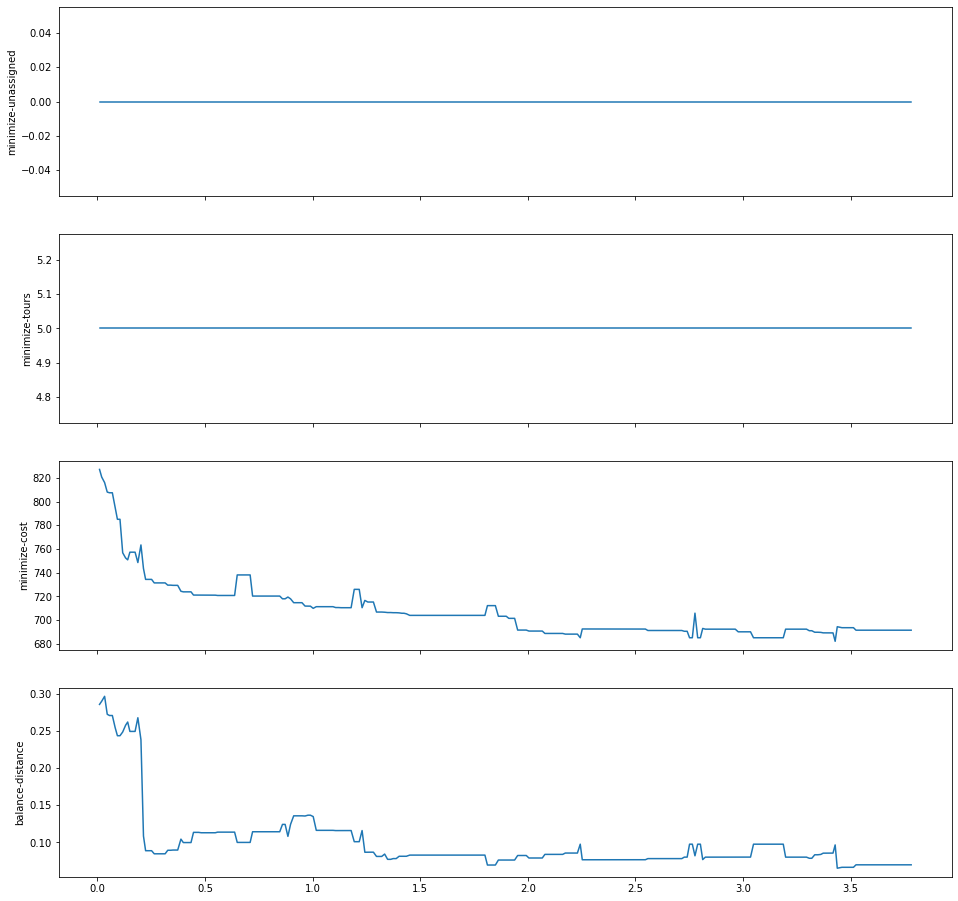

In [10]:
x_column = 'timestamp'

df = extract_evolution_metrics(solution)

fitness_columns = [column for column in df.columns.values if column.startswith('fitness_')]
plot_len = len(fitness_columns)
fig, axs = plt.subplots(plot_len, figsize=(16, plot_len * 4) , sharex=True)

for idx, fitness_column in enumerate(fitness_columns):
    axs[idx].plot(df[x_column], df[fitness_column])
    axs[idx].set(ylabel = objectives.type[idx])

## Geojson Visualization

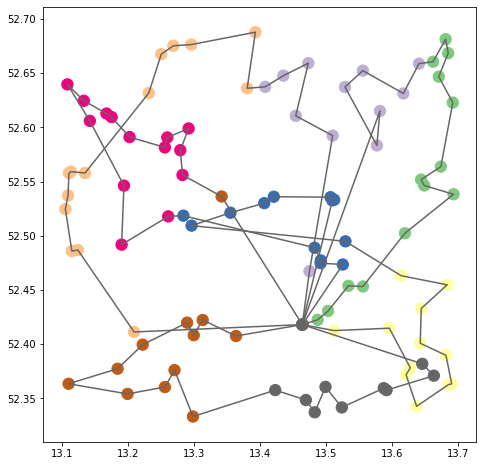

In [11]:
if not solution_geo.empty:
    plot = solution_geo.plot(cmap='Accent', markersize=128, figsize=(16,8))